In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import struct
import pandas as pd
import seaborn as sns
from math import e
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)


In [21]:
name = 'Picccard'
direction = 'negx'
#name = 'argos-constanca'
#direction = 'posy'
#name = 'argos-felix'
#direction = 'negy'
name = 'argos-toyger'
#direction = 'posy'
#name = 'euler_explosion'
#direction = 'negy'
#name = 'flight_2'
#direction = 'posy'
#name = 'Helvetia'

log = '../../cats-logs/log_parsing/output/' + name + '/processed/'
log_imu = log + name + ' - imu_processed.csv'
log_baro = log + name + ' - baro_processed.csv'
log_filtered = log + name + ' - filtered_data_info_processed.csv'

imu_data_df = pd.read_csv(log_imu) 
baro_data_df = pd.read_csv(log_baro) 
filtered_data_df = pd.read_csv(log_filtered) 

imu_0 = imu_data_df.loc[imu_data_df['id'] == 'IMU0']
imu_1 = imu_data_df.loc[imu_data_df['id'] == 'IMU1']

baro_0 = baro_data_df.loc[baro_data_df['id'] == 'BARO0']
baro_1 = baro_data_df.loc[baro_data_df['id'] == 'BARO1']
baro_2 = baro_data_df.loc[baro_data_df['id'] == 'BARO2']


In [56]:
import numpy as np
Ts = 1/100
signal_start_thrust = 24
signal_size_pressure = 5000
set_to_0_time = 0.09
raw_pressure = np.zeros(signal_size_pressure)
t = np.zeros(signal_size_pressure)





for k in range(signal_size_pressure):
    raw_pressure[k] = float(baro_0.iloc[signal_start_thrust + k].P)/3 + float(baro_1.iloc[signal_start_thrust + k].P)/3 + float(baro_2.iloc[signal_start_thrust + k].P)/3
    t[k] = imu_0.iloc[signal_start_thrust + k].ts + set_to_0_time
        
fit = np.polyfit(t, raw_pressure,15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_pressure)
plt.plot(t, fitted_curve)
plt.show()
print(fit)


max(velocity_new)

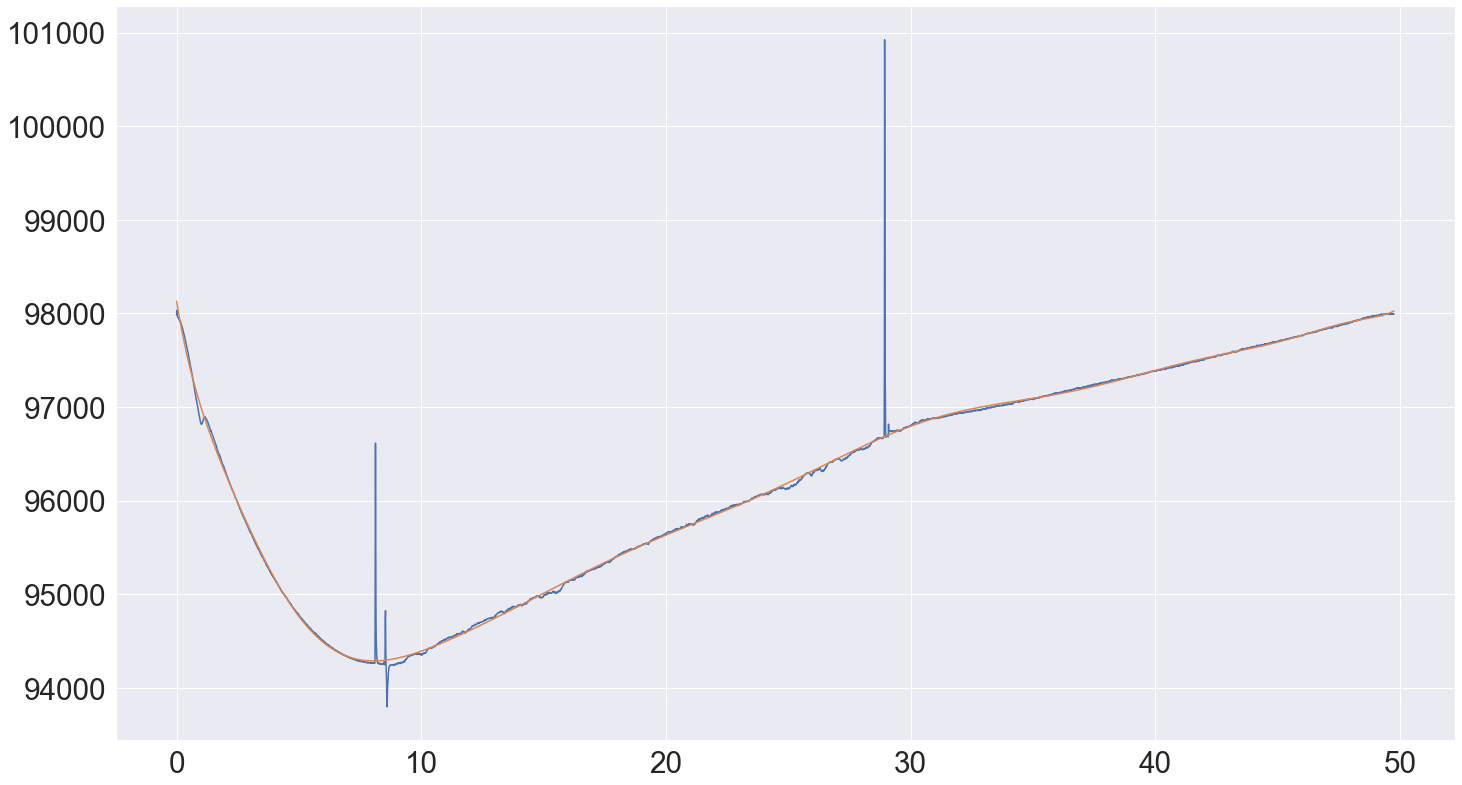

[-3.94495749e-17  2.01652728e-14 -4.40991043e-12  5.55499637e-10
 -4.53531322e-08  2.54583634e-06 -1.01332244e-04  2.89971633e-03
 -5.97181557e-02  8.75437771e-01 -8.90805408e+00  6.01944940e+01
 -2.53272704e+02  6.59728047e+02 -1.59072750e+03  9.81285810e+04]
[-1.0000e-03  9.0000e-03  1.9000e-02 ...  4.9739e+01  4.9749e+01
  4.9759e+01]


In [123]:
signal_size_thrust = 112
set_to_0_time = 0.09

raw_acc_x = np.zeros(signal_size_thrust)
raw_acc_y = np.zeros(signal_size_thrust)
raw_acc_z = np.zeros(signal_size_thrust)
t = np.zeros(signal_size_thrust)



for k in range(signal_size_thrust):

    raw_acc_x[k] = (imu_0.iloc[signal_start_thrust + k].Ax + imu_1.iloc[signal_start_thrust + k].Ax)/2
    raw_acc_y[k] = (imu_0.iloc[signal_start_thrust + k].Ay + imu_1.iloc[signal_start_thrust + k].Ay)/2
    raw_acc_z[k] = (imu_0.iloc[signal_start_thrust + k].Az + imu_1.iloc[signal_start_thrust + k].Az)/2
    t[k] = imu_0.iloc[signal_start_thrust + k].ts + set_to_0_time

fit = np.polyfit(t, raw_acc_y, 15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_acc_y)
plt.plot(t, fitted_curve)
plt.show()
print(fit)
    

In [125]:
signal_size_coast = 630
signal_start_coast = signal_start_thrust + signal_size_thrust

raw_acc_x = np.zeros(signal_size_coast)
raw_acc_y = np.zeros(signal_size_coast)
raw_acc_z = np.zeros(signal_size_coast)
t = np.zeros(signal_size_coast)



for k in range(signal_size_coast):

    raw_acc_x[k] = (imu_0.iloc[signal_start_coast + k].Ax + imu_1.iloc[signal_start_coast + k].Ax)/2
    raw_acc_y[k] = (imu_0.iloc[signal_start_coast + k].Ay + imu_1.iloc[signal_start_coast + k].Ay)/2
    raw_acc_z[k] = (imu_0.iloc[signal_start_coast + k].Az + imu_1.iloc[signal_start_coast + k].Az)/2
    t[k] = imu_0.iloc[signal_start_coast + k].ts + set_to_0_time

fit = np.polyfit(t, raw_acc_y,15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_acc_y)
plt.plot(t, fitted_curve)
plt.show()
print(fit)